<a href="https://colab.research.google.com/github/iamgchattejee/Fruit-Freshness-Prediction/blob/main/MobileNet_Amloki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [ ]:
DIRECTORY = '/content/drive/MyDrive/Colab Notebooks/Amloki-classified'

CATEGORIES = ['BAD', 'FRESH']

In [ ]:
data = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path)
        new_arr = cv2.resize(arr, (224, 224))
        data.append([new_arr, label])

# New Section

In [ ]:
X = []
y = []

IMG_SIZE=224
for features, label in data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y = np.array(y)

In [ ]:
X.shape

(279, 224, 224, 3)

Populating the interactive namespace from numpy and matplotlib


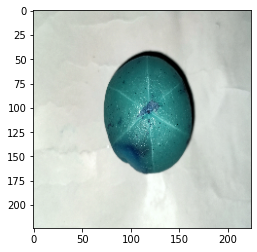

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(X[190])
plt.show()

In [ ]:
import pickle
pickle.dump(X, open('/content/drive/MyDrive/X.pkl', 'wb'))
pickle.dump(y, open('/content/drive/MyDrive/y.pkl', 'wb'))

In [ ]:
import pickle
pickle_in=open('/content/drive/MyDrive/X.pkl', 'rb')
X=pickle.load(pickle_in)

pickle_in=open('/content/drive/MyDrive/y.pkl', 'rb')
y=pickle.load(pickle_in)



In [ ]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(X, y,
	test_size=0.15, stratify=y, random_state=42)

print("Train Set Length: {} \nTest Set Length: {}".format(len(trainY), len(testY)))

print(trainY)
print(testY)

Train Set Length: 237 
Test Set Length: 42
[1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1
 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 0 1]


In [ ]:
trainx.shape

In [ ]:
trainX.shape[1:]

(224, 224, 3)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from tensorflow.python.keras import regularizers
trainx=trainX/255.0
base_model = tf.keras.applications.MobileNetV2(input_shape=trainx.shape[1:],
                                               include_top=False, 
                                               weights=None)
base_model.trainable = False
print(trainx.shape)
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dense(64, activation='relu'),
  
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

batch_size = 32
epochs = 50

history=model.fit_generator(trainX,trainY,batch_size,epochs)



(237, 224, 224, 3)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


ValueError: ignored

In [ ]:
base_model = MobileNet(include_top=False,
input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
  for layer in base_model.layers[:]:
  layer.trainable = False
input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
my_model = base_model(input)
my_model = GlobalAveragePooling2D()(my_model)
my_model = Dense(64, activation=’relu’)(my_model)
my_model = Dropout(0.5)(my_model)
predictions = Dense(NUM_CLASSES, activation=’softmax’)(my_model)       
  return Model(inputs=input, outputs=predictions)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred=(model.predict(testX) > 0.5).astype("int32")
print(y_pred)
print(testY)


[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]
[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 0 1]


**TEST REPORT**

In [ ]:
print(classification_report(testY, y_pred, target_names=CATEGORIES))
confusion_matrix(testY, y_pred)


              precision    recall  f1-score   support

         BAD       1.00      0.78      0.88         9
       FRESH       0.94      1.00      0.97        33

    accuracy                           0.95        42
   macro avg       0.97      0.89      0.92        42
weighted avg       0.96      0.95      0.95        42



array([[ 7,  2],
       [ 0, 33]])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


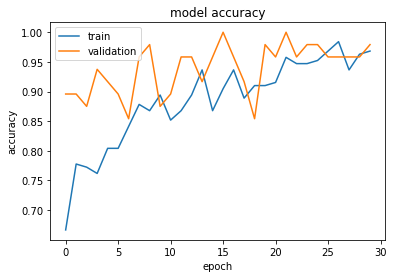

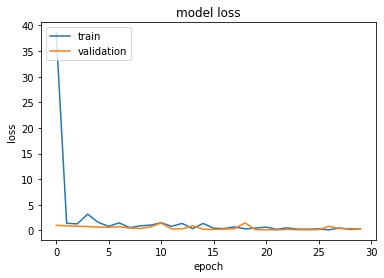

In [ ]:
print(history.history.keys())
#  "Accuracy"
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/amloki_model_2.h5') 

In [ ]:
testY
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 64)      640       
_________________________________________________________________
activation_5 (Activation)    (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 32)      18464     
_________________________________________________________________
activation_6 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 64)       